In [1]:
#Las libreroas

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



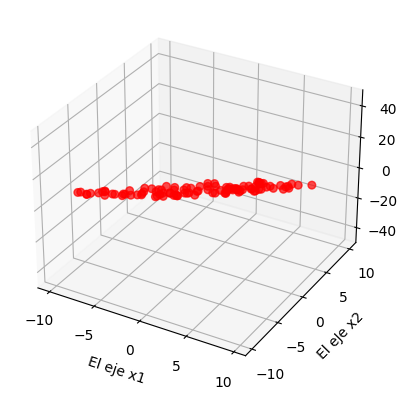

In [9]:
#1 definir la ecuación y=2.1*x1-3.1*x2 y generar números aleatorios que pertenecen al plano
#Realizar un diagrama 3D de los puntos generados aleatoriamente.

# La semilla
np.random.seed(0)
# Generamos datos aleatorios para x1 y x2 en un rango específico
x1 = np.random.uniform(-10, 10, 100)  # 100 puntos entre -10 y 10 para x1
x2 = np.random.uniform(-10, 10, 100)  # 100 puntos entre -10 y 10 para x2
#Definimos la funcion
y = 2.1 * x1 - 3.1 * x2
#Ploteamos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='red', s=30, alpha=0.7)
ax.set_xlabel('El eje x1')
ax.set_ylabel('El eJe x2')
ax.set_zlabel('y')
plt.show()

In [24]:
#2 Inicalizamos el parámetro 𝜃 de forma aleartoria


# Configuración inicial
np.random.seed(42)




# Agregamos una columna de 1's a X
X = np.c_[np.ones(x1.shape[0]), x1, x2]  # Matriz de características con término de sesgo
# Inicialización aleatoria de los parámetros θ
theta = np.random.randn(3)

learning_rate = 0.001
iterationes = 1000
# La Función de cose  y descenso de gradiente
for _ in range(iterationes):
    y_pred = X.dot(theta)
    error = y_pred - y #Errpr
    # Gradiente
    gradiente = X.T.dot(error) / len(y)


    theta -= learning_rate * gradiente  #Actualizar parametros

print("Valores de θ oPtimos hallados:")
print(f"θ0 = {theta[0]}")
print(f"θ1 = {theta[1]}")
print(f"θ2 = {theta[2]}")


Valores de θ oPtimos hallados:
θ0 = 0.14843834088613841
θ1 = 2.102287798344567
θ2 = -3.1025981600596633


In [12]:
#3 Contruir la matriz X con dimensiones (n+1,m)

n = 2  # características ( x1 y x2)
m = 100  #  datos de entrenamiento
# Lo que hicimos arriba
x1 = np.random.uniform(-10, 10, m)
x2 = np.random.uniform(-10, 10, m)
# Construimos la matriz X de dimensiones
X = np.vstack((np.ones(m), x1, x2))
# Verificamos la forma de la matriz X
print("Dimensiones de X:", X.shape)
print("Matriz X:\n", X)


Dimensiones de X: (3, 100)
Matriz X:
 [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.         

In [30]:
#4 Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):
# Inicialización de variables
np.random.seed(0)
m = 100  #  entrenamiento
n = 2  #  características
# La misma generacion de datos
x1 = np.random.uniform(-10, 10, m)
x2 = np.random.uniform(-10, 10, m)
y = 2.1 * x1 - 3.1 * x2
X = np.vstack((np.ones(m), x1, x2)) # volvemos a armar la matríz
theta = np.random.randn(n + 1, 1)  # Inicializacion aleatoria de theta
#  Predicción h = θ^T X
h = np.dot(theta.T, X)  # h tendrá dimensiones (1, m)
#  Calcular el error Λ = h - Y
Y = y.reshape(1, m)
Lambda = h - Y  # Error entre la predicción y el valor real, dimensiones (1, m)
#  Error al cuadrado Λ_* = (h - Y)^2
Lambda_cuad = Lambda ** 2
# El cosye
J = (1 / (2 * m)) * np.sum(Lambda_cuad)

print("Función de coste J es", round(J,2))


Función de coste J es 247.39


In [31]:
#5 Aplicar el gradiente descendiente
# Parámetros
learning_rate = 0.001
iterationes = 1000

# Volvemos a inicializar theta aleatorio
theta = np.random.randn(n + 1, 1)  # θ con dimensiones (n+1, 1)

# Gradiente descendente
for i in range(iterationes):
    h = np.dot(theta.T, X)
    Lambda = h - Y
    # Ahora si el gradiente
    gradient = np.dot(Lambda, X.T) / m  # Dimensiones (1, n+1)
    #  Actualizar los parámetros θ = θ - α * ∇J
    theta -= learning_rate * gradient.T

print("El gradiente ", gradient)
print("Parámetros θ encontrados:")
print(f"θ0 = {theta[0][0]}")
print(f"θ1 = {theta[1][0]}")
print(f"θ2 = {theta[2][0]}")


El gradiente  [[-0.20813724 -0.0032079   0.00364309]]
Parámetros θ encontrados:
θ0 = -0.2117910318587481
θ1 = 2.0967357815430723
θ2 = -3.0962929591050385


In [27]:

#6 Iterar  para encontrar los valores θ que se ajustan al plano
# Configuración
learning_rate = 0.001
iterationes = 1000
# La misma inicalizacion
theta = np.random.randn(n + 1, 1)  # θ con dimensiones (n+1, 1)
Y = y.reshape(1, m)
# Gradiente descendiente
for i in range(iterationes):
    h = np.dot(theta.T, X)
    Lambda = h - Y
    gradiente = np.dot(Lambda, X.T) / m  #
    theta -= learning_rate * gradiente.T  # Hasta ca es la misma vuelta

    # Calculamos J para 100 iteraciones
    if i % 100 == 0:
        J = (1 / (2 * m)) * np.sum(Lambda ** 2)
        print(f"Iteración {i}: Costo J = {J}")

# Resultados
print("Parámetros θ encontrados:")
print(f"θ0 = {theta[0][0]}")
print(f"θ1 = {theta[1][0]}")
print(f"θ2 = {theta[2][0]}")


Iteración 0: Costo J = 133.8908800737285
Iteración 100: Costo J = 0.43197499544778944
Iteración 200: Costo J = 0.25987949209086647
Iteración 300: Costo J = 0.21343351233090374
Iteración 400: Costo J = 0.17536536222273533
Iteración 500: Costo J = 0.1440871715703315
Iteración 600: Costo J = 0.1183877635667528
Iteración 700: Costo J = 0.09727210555693211
Iteración 800: Costo J = 0.07992263925269617
Iteración 900: Costo J = 0.06566762617653042
Parámetros θ encontrados:
θ0 = 0.3314404562653836
θ1 = 2.105108309097296
θ2 = -3.105801300058567


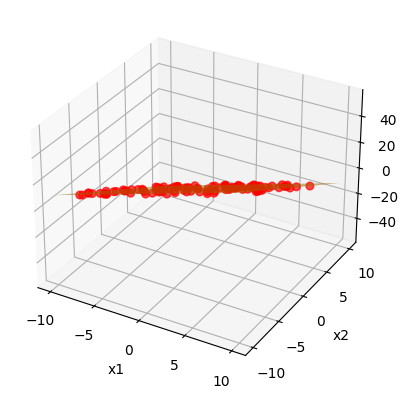

In [28]:
#Verifiquemos si todo esto se ajusta a los se ajusta al diagrama 3D de los puntos generados aleatoriamente.


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Gráfico de los puntos de datos generados aleatoriamente
ax.scatter(x1, x2, y, color='red', marker='o', s=30, alpha=0.7, label="Puntos de datos") # Lo del primer punto
x1_range = np.linspace(-10, 10, 10)
x2_range = np.linspace(-10, 10, 10)

x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = theta[0] + theta[1] * x1_grid + theta[2] * x2_grid

# Ploteamos a ver si ajusta
ax.plot_surface(x1_grid, x2_grid, y_grid, color='orange', alpha=0.5, rstride=100, cstride=100, edgecolor='none', label="Plano ajustado")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()